# 传染病模型

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import random
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

## SI模型

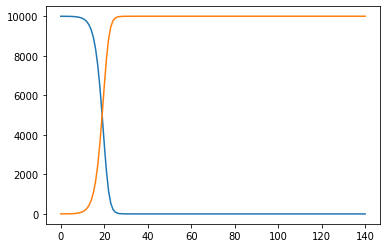

In [399]:
S = [0]*141
I = [0]*141
N = 10000
I[0] = 1
S[0] = N-I[0]
r = 20
beta = 0.03
for i in range(140):
    S[i+1] = S[i]-r*beta*S[i]*I[i]/N
    I[i+1] = I[i]+r*beta*S[i]*I[i]/N
T = range(0, 141)
plt.plot(T, S, T, I)
plt.show()

c = {'S': S, 'I': I}

c = pd.DataFrame(c)

c.to_excel('数据1.xlsx')

## SIS模型

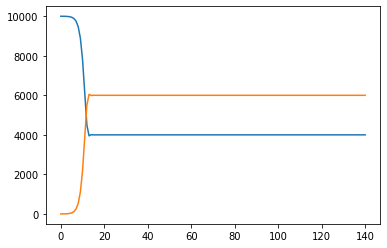

In [409]:
S = [0]*141
I = [0]*141
N = 10000
I[0] = 1
S[0] = N-I[0]
r = 20
beta = 0.1
gamma=0.8
for i in range(140):
    S[i+1] = S[i]-r*beta*S[i]*I[i]/N+gamma*I[i]
    I[i+1] = I[i]+r*beta*S[i]*I[i]/N-gamma*I[i]
T = range(0, 141)
plt.plot(T, S, T, I)
plt.show()

c = {'S': S, 'I': I}

c = pd.DataFrame(c)

c.to_excel('数据1.xlsx')

## SIR模型

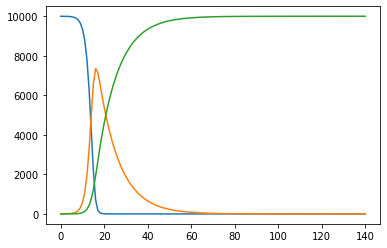

In [412]:
S = [0]*141
I = [0]*141
R = [0]*141
N = 10000
I[0] = 1
S[0] = N-I[0]
R[0] = 0
r = 20
beta = 0.05
gamma = 0.1
for i in range(140):
    S[i+1] = S[i]-r*beta*S[i]*I[i]/N
    I[i+1] = I[i]+r*beta*S[i]*I[i]/N-gamma*I[i]
    R[i+1] = R[i]+gamma*I[i]
T = range(0, 141)
plt.plot(T, S, T, I, T, R)
plt.show()

c = {'S': S, 'I': I, 'R': R}

c = pd.DataFrame(c)

c.to_excel('数据1.xlsx')

## SEIR模型

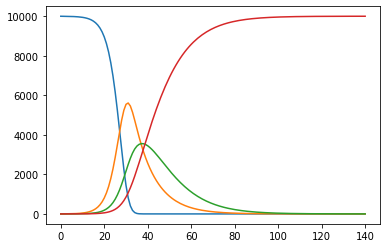

In [419]:
S = [0]*141
E = [0]*141
I = [0]*141
R = [0]*141

# 人口总数
N = 10000
# 潜伏者
E[0] = 0
# 传染者
I[0] = 1
# 易感者
S[0] = N-I[0]
# 康复者
R[0] = 0
# 感染者接触易感人群的数量
r = 20
# 传染概率
beta = 0.1
# 潜伏者转为感染者
a = 0.1
# 康复概率
y = 0.1

for i in range(140):
    S[i+1] = (S[i]-r*beta*S[i]*I[i]/N)
    E[i+1] = (E[i]+r*beta*S[i]*I[i]/N-a*E[i])
    I[i+1] = (I[i]+a*E[i]-y*I[i])
    R[i+1] = (R[i]+y*I[i])
T = range(0, 141)

plt.plot(T, S, T, E, T, I, T, R)
plt.show()

c = {'S': S, 'E': E, 'I': I, 'R': R}

c = pd.DataFrame(c)

c.to_excel('数据1.xlsx')

## SEIR改进模型

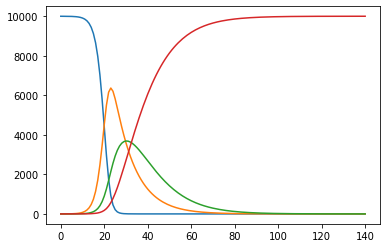

In [26]:
S = [0]*141
E = [0]*141
I = [0]*141
R = [0]*141

# 人口总数
N = 10000

# 潜伏者
E[0] = 0

# 传染者
I[0] = 1

# 易感者
S[0] = N-I[0]

# 康复者
R[0] = 0

# 感染者接触易感人群的数量
r1 = 20

# 感染者的传染概率
beta1 = 0.03

# 潜伏者接触易感人群的数量
r2 = 20

# 潜伏者的传染概率
beta2 = 0.03

# 潜伏者转为感染者
a = 0.1

# 康复概率
y = 0.1

for i in range(140):
    S[i+1] = (S[i]-r1*beta1*S[i]*I[i]/N-r2*beta2*S[i]*E[i]/N)
    E[i+1] = (E[i]+r1*beta1*S[i]*I[i]/N-a*E[i]+r2*beta2*S[i]*E[i]/N)
    I[i+1] = (I[i]+a*E[i]-y*I[i])
    R[i+1] = (R[i]+y*I[i])
T = range(0, 141)

plt.plot(T, S, T, E, T, I, T, R)
plt.show()

In [ ]:
c = {'S': S, 'E': E, 'I': I, 'R': R}

c = pd.DataFrame(c)

c.to_excel('数据2.xlsx')

## SEIR再次改进

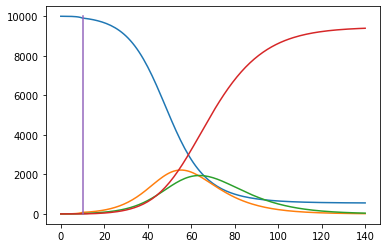

In [29]:
S = [0]*141
E = [0]*141
I = [0]*141
R = [0]*141

# 人口总数
N = 10000

# 潜伏者
E[0] = 0

# 传染者
I[0] = 1

# 易感者
S[0] = N-I[0]

# 康复者
R[0] = 0

# 感染者接触易感人群的数量
r1 = 20

# 感染者的传染概率
beta1 = 0.03

# 潜伏者接触易感人群的数量
r2 = 20

# 潜伏者的传染概率
beta2 = 0.03

# 潜伏者转为感染者
a = 0.1

# 康复概率
y = 0.1


for i in range(140):
    if i >= 10:
        r1 = 5
        r2 = 5
    S[i+1] = S[i]-r1*beta1*S[i]*I[i]/N-r2*beta2*S[i]*E[i]/N
    E[i+1] = E[i]+r1*beta1*S[i]*I[i]/N-a*E[i]+r2*beta2*S[i]*E[i]/N
    I[i+1] = I[i]+a*E[i]-y*I[i]
    R[i+1] = R[i]+y*I[i]
T = range(0, 141)
T1 = [10,10]
T2 = [0,10000]
plt.plot(T, S, T, E, T, I, T, R, T1, T2)
plt.show()

对SEIR的最终改进

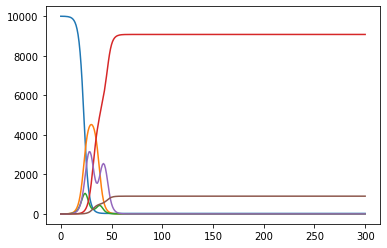

In [910]:
k = 300
S = [0]*(k+1)
E = [0]*(k+1)
I = [0]*(k+1)
R = [0]*(k+1)
C = [0]*(k+1)
D = [0]*(k+1)

temp4 = [0]*(k+1)

N = 10000
E[0] = 0
I[0] = 1
S[0] = N-I[0]
R[0] = 0
C[0] = 0


r1 = 20
r2 = 20
beta1 = 0.03
beta2 = 0.03
alpha1 = 0.5
alpha2 = 0.5
gamma1 = 0.2
gamma2 = 0.1

t1 = 14  # 潜伏期天数
t2 = 7  # 治疗的天数
t3 = 1  # 感染后接受治疗的等待时间


for i in range(k):
    
#     if i>=10:
#         r1=5
#         r2=5
#         t1=14

    if i-t1-1 >= 0:
        temp1 = alpha2*(temp4[i-t1-1]/N)*S[i-t1-1]  # 转为感染和自愈的
    else:
        temp1 = 0

    # 一部分来自i-t2-t3-t1的从S转E转I，一部分来自i-t2-t3的从S转为I->第i-t2-t3天转为感染者的
    # ->第i-t2天进入医院的->出院的和死亡的
    if i-t1-t2-t3-1 >= 0 and i-t2-t3-1 >= 0:
        temp2 = alpha2*(1-gamma1)*(temp4[i-t1-t2-t3-1]/N) * \
            S[i-t1-t2-t3-1]+alpha1*(temp4[i-t2-t3-1]/N)*S[i-t2-t3-1]
    elif i-t1-t2-t3-1 < 0 and i-t2-t3-1 >= 0:
        temp2 = alpha1*(temp4[i-t2-t3-1]/N)*S[i-t2-t3-1]
    else:
        temp2 = 0

    if i-t1-t3-1 >= 0 and i-t3-1 >= 0:
        temp3 = alpha2*(1-gamma1)*(temp4[i-t1-t3-1]/N) * \
            S[i-t1-t3-1]+alpha1*(temp4[i-t3-1]/N)*S[i-t3-1]
    elif i-t1-t3-1 < 0 and i-t3-1 >= 0:
        temp3 = alpha1*(temp4[i-t3-1]/N)*S[i-t3-1]   # 进入医院的,即i-t3天转为感染者的
    else:
        temp3 = 0

    if r1*beta1*I[i]+r2*beta2*E[i] >= N:
        temp4[i] = N
    else:
        temp4[i] = r1*beta1*I[i]+r2*beta2*E[i]

    S[i+1] = S[i]-((temp4[i])/N)*S[i]

    E[i+1] = E[i]+alpha2*((temp4[i])/N)*S[i]-temp1

    I[i+1] = I[i]+alpha1*((temp4[i])/N)*S[i]+(1-gamma1)*temp1-temp3

    R[i+1] = R[i]+gamma1*temp1+(1-gamma2)*temp2

    C[i+1] = C[i]+temp3-temp2

    D[i+1] = D[i]+gamma2*temp2

T = range(0, k+1)
plt.plot(T, S, T, E, T, I, T, R, T, C, T, D)
# plt.plot(T, D)
plt.show()

c = {'S': S, 'E': E, 'I': I, 'R': R, 'C': C, 'D': D}

c = pd.DataFrame(c)

c.to_excel('数据1.xlsx')

# 网络化传播模型

In [218]:
# 计算数组的有效长度
def A_length(L):
    for i in range(len(L)):
        if L[i] == None:
            return (i)
        
def print_list(L):
    return(L[0:A_length(L)])

# 功能：返回在list1中且在list2中的元素
def find_error(list1, list2):
    list3 = [x for x in list1[0:A_length(
        list1)] if x in list2[0:A_length(list2)]]
    print(list3)

# 功能：输入字典，输出合并的列表
def now_list(dict1):
    now_list = []
    for key in dict1:
        now_list.extend(dict1[key])
    return now_list

def change_day(new_list, old_dict):
    name = list(old_dict)
    old_dict1 = old_dict.copy()
    for i in range(1, len(old_dict1)):
        old_dict[name[i]] = old_dict1[name[i-1]]
    old_dict[name[0]] = new_list
    return old_dict

In [269]:
G=nx.random_graphs.barabasi_albert_graph(500,2)

In [422]:
G=nx.random_graphs.erdos_renyi_graph(500,0.02)

In [982]:
def spread(G, day, figure='false'):
    # 初始化来存储数据
    data = np.zeros([day+1, 5])
    # 明确参数
    beta1 = 0.8  # 感染者传染疾病的概率
    beta2 = 0.5  # 潜伏者传染疾病的概率

    a1 = 0.5  # 传染后成为感染者的概率
    a2 = 1-a1  # 传染后成为潜伏者的概率

    y1 = 0.2  # 潜伏者自愈概率
    y2 = 0.8  # 医治成功的概率

    d1 = 0  # 感染者接受治疗前经历的天数
    d2 = 14  # 潜伏期的天数
    d3 = 14  # 治愈需要的天数

    # 需要统计的人数：
    I = {}  # 感染者（0-1）天的人数
    E = {}  # 潜伏者（0-4）天的人数
    C = {}  # 正在治疗的人数（0-4）天的人数
    S = []  # 未感染的人
    D = []  # 死亡的人数
    R = []  # 康复的人数

    # 初始化
    for i in range(d1+1):
        I['day'+str(i)] = []

    for i in range(d2+1):
        E['day'+str(i)] = []

    for i in range(d3+1):
        C['day'+str(i)] = []

    # 初始的传染者
    I['day0'] = [2]

    data[0, 0] = len(now_list(I))
    data[0, 1] = len(now_list(E))
    data[0, 2] = len(now_list(C))
    data[0, 3] = len(R)
    data[0, 4] = len(D)

    for j in range(day):

        I_node = []  # 与传染者直接接触的人群
        for i in range(len(now_list(I))):
            I_node.extend(list(G[(now_list(I))[i]]))
        I_node = list(set(I_node))  # 取消重复的,得到邻居节点
        I_node = [y for y in I_node if (y not in now_list(E) and y not in now_list(
            I) and y not in now_list(C) and y not in D and y not in R)]  # 清洗数据，把已经在E和I中的节点去除掉
        I1_node = I_node.copy()  # 复制出来

        I_new = []
        E_new = []
        C_new = []
        R_new = []
        D_new = []
        I_name = list(I)
        E_name = list(E)
        C_name = list(C)

        for i in range(len(I1_node)):
            if random.random() <= beta1 and random.random() <= a1:  # 转为感染者
                I_new.append(I1_node[i])
                I_node.remove(I1_node[i])
        for i in range(len(I_node)):
            if random.random() <= beta1 and random.random() <= a2:  # 转为潜伏者
                E_new.append(I_node[i])

        E_node = []  # 与潜伏者直接接触的人群
        for i in range(len(now_list(E))):
            E_node.extend(list(G[(now_list(E))[i]]))
        E_node = list(set(E_node))
        E_node = [y for y in E_node if (y not in now_list(I) and y not in now_list(
            E) and y not in I_new and y not in E_new and y not in now_list(C) and y not in D and y not in R)]
        E1_node = E_node.copy()

        for i in range(len(E1_node)):
            if random.random() <= beta2 and random.random() <= a1:
                I_new.append(E1_node[i])
                E_node.remove(E1_node[i])
        for i in range(len(E_node)):
            if random.random() <= beta2 and random.random() <= a2:
                E_new.append(E_node[i])

        # 处理移除的人
        # 感染者移除的数据，成为C_new
        # 潜伏者移除的数据，成为一部分成为I_new，另一部分成为R_new
        # 医治者移除的数据，成为死掉的人或者康复的人

        C_new.extend(I[I_name[-1]])

        for i in range(len(E[E_name[-1]])):
            if random.random() > y1:
                I_new.append((E[E_name[-1]])[i])
            else:
                R_new.append((E[E_name[-1]])[i])

        for i in range(len(C[C_name[-1]])):
            if random.random() <= y2:
                R_new.append((C[C_name[-1]])[i])
            else:
                D_new.append((C[C_name[-1]])[i])

        I = change_day(I_new, I)
        E = change_day(E_new, E)
        C = change_day(C_new, C)
        R.extend(R_new)
        D.extend(D_new)

        data[j+1, 0] = len(now_list(I))
        data[j+1, 1] = len(now_list(E))
        data[j+1, 2] = len(now_list(C))
        data[j+1, 3] = len(R)
        data[j+1, 4] = len(D)

    data = pd.DataFrame(data)
    data.columns = ['感染人数', '潜伏人数', '住院/隔离人数', '治愈人数', '死亡人数']

    if figure == 'true':
        node_color = []
        for node in G:
            if node in now_list(I):
                node_color.append('red')
            elif node in now_list(E):
                node_color.append('salmon')
            elif node in now_list(C):
                node_color.append('palegreen')
            elif node in (R):
                node_color.append('lime')
            elif node in (D):
                node_color.append('gray')
            else:
                node_color.append('cornflowerblue')
        pos = nx.spring_layout(G, scale=1)
        nx.draw(G, pos, with_labels=True, node_size=150,
                font_size=10, node_color=node_color)
        plt.savefig('1.pdf',dpi=600,format='pdf')
    return data

,感染人数,潜伏人数,住院/隔离人数,治愈人数,死亡人数
0,2.0,0.0,0.0,0.0,0.0
1,7.0,3.0,2.0,0.0,0.0
2,57.0,8.0,9.0,0.0,0.0
3,188.0,26.0,66.0,0.0,0.0
4,144.0,37.0,254.0,0.0,0.0
5,43.0,38.0,398.0,0.0,0.0
6,5.0,38.0,441.0,0.0,0.0
7,0.0,39.0,446.0,0.0,0.0
8,4.0,39.0,446.0,0.0,0.0
9,1.0,39.0,450.0,0.0,0.0


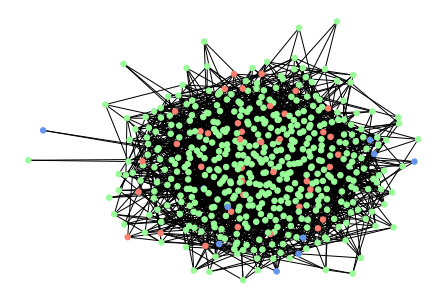

In [937]:
spread(G,10,'true')

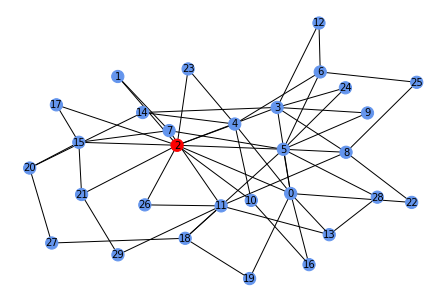

In [933]:
H=nx.random_graphs.barabasi_albert_graph(30,2)
pos=nx.spring_layout(H,scale=1)
node_colors=['cornflowerblue' if n!=2  else 'red' for n in H.nodes()]
nx.draw(H,pos,with_labels=True,node_size=150,font_size=10,node_color=node_colors)
plt.savefig('1.pdf',dpi=600,format='pdf')

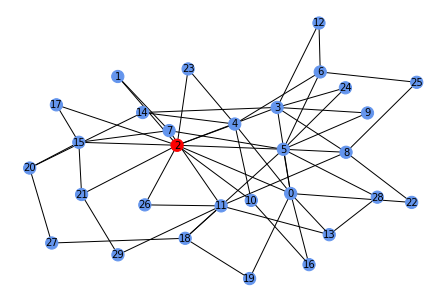

In [938]:
nx.draw(H,pos,with_labels=True,node_size=150,font_size=10,node_color=node_colors)

,感染人数,潜伏人数,住院/隔离人数,治愈人数,死亡人数
0,1.0,0.0,0.0,0.0,0.0
1,3.0,2.0,1.0,0.0,0.0


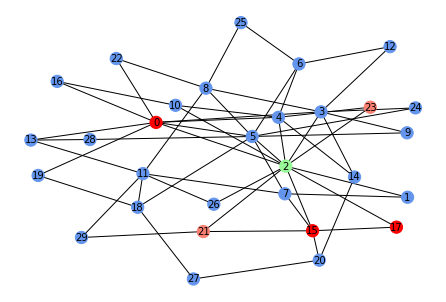

In [983]:
spread(H,1,'true')

In [970]:
H[2]

AtlasView({0: {}, 1: {}, 3: {}, 4: {}, 5: {}, 10: {}, 15: {}, 17: {}, 21: {}, 23: {}, 26: {}})